In [1]:
#Import libraries for data analysis and visualisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Import Dataset
df = pd.read_csv("train.csv")

In [3]:
#Preview dataset to devise a preprocessing pipeline
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
def yes(condition):
    if condition=='yes':
        return 1
    else:
        return 0

In [5]:
df = pd.get_dummies(df, columns=['Gender','MTRANS'])

In [6]:
df['family_history_with_overweight'] = df['family_history_with_overweight'].apply(yes)
df['FAVC'] = df['FAVC'].apply(yes)
df['SMOKE'] = df['SMOKE'].apply(yes)
df['SCC'] = df['SCC'].apply(yes)

In [7]:
#ordinal encoding
consumption_map = {'no':0, 'Sometimes':1, 'Frequently':2, 'Always':3}
df['CAEC'] = df['CAEC'].map(consumption_map)
df['CALC'] = df['CALC'].map(consumption_map)

In [8]:
df.head()

,id,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,TUE,CALC,NObeyesdad,Gender_Female,Gender_Male,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,1,0,...,0.976473,1,Overweight_Level_II,False,True,False,False,False,True,False
1,1,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,2,0,...,1.000000,0,Normal_Weight,True,False,True,False,False,False,False
2,2,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,1,0,...,1.673584,0,Insufficient_Weight,True,False,False,False,False,True,False
3,3,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,1,0,...,0.780199,1,Obesity_Type_III,True,False,False,False,False,True,False
4,4,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,1,0,...,0.931721,1,Overweight_Level_II,False,True,False,False,False,True,False


In [9]:
class DataPipeline1:
    def __init__(self, data_path):
        self.data_path = data_path
        self.data = None
        self.scaled_data = None
        self.pca_data = None
    def load_data(self):
        self.data = pd.read_csv(self.data_path)
    def yes(condition):
        if condition=='yes':
            return 1
        else:
            return 0
    def run_pipeline(self):
        self.load_data()
        #one-hot encoding
        self.data = pd.get_dummies(self.data, columns=['Gender','MTRANS'])
        #binary encoding
        self.data['family_history_with_overweight'] = self.data['family_history_with_overweight'].apply(yes)
        self.data['FAVC'] = self.data['FAVC'].apply(yes)
        self.data['SMOKE'] = self.data['SMOKE'].apply(yes)
        self.data['SCC'] = self.data['SCC'].apply(yes)
        #ordinal encoding
        consumption_map = {'no':0, 'Sometimes':1, 'Frequently':2, 'Always':3}
        self.data['CAEC'] = self.data['CAEC'].map(consumption_map)
        self.data['CALC'] = self.data['CALC'].map(consumption_map)

In [10]:
dataset = DataPipeline1("train.csv")
dataset.run_pipeline()

In [11]:
#Reassign the data frame with the processed features
df = dataset.data
df.head()

,id,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,TUE,CALC,NObeyesdad,Gender_Female,Gender_Male,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,1,0,...,0.976473,1,Overweight_Level_II,False,True,False,False,False,True,False
1,1,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,2,0,...,1.000000,0,Normal_Weight,True,False,True,False,False,False,False
2,2,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,1,0,...,1.673584,0,Insufficient_Weight,True,False,False,False,False,True,False
3,3,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,1,0,...,0.780199,1,Obesity_Type_III,True,False,False,False,False,True,False
4,4,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,1,0,...,0.931721,1,Overweight_Level_II,False,True,False,False,False,True,False


### Correlation visualization (OvR)
Ordinal encoding of the label to achive a higher correlated matrix rather than a one hot encoding

In [12]:
df['NObeyesdad'].unique()

array(['Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight',
       'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I',
       'Obesity_Type_I'], dtype=object)

In [13]:
class_map = {'Insufficient_Weight':0.9, 'Normal_Weight':2.17, 'Overweight_Level_I':2.66, 'Overweight_Level_II':2.83, 'Obesity_Type_I':3.25, 'Obesity_Type_II':3.75, 'Obesity_Type_III':4.9}
df2=df.copy()
df2['NObeyesdad']=df2['NObeyesdad'].map(class_map)
df2.head()

,id,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,TUE,CALC,NObeyesdad,Gender_Female,Gender_Male,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,1,0,...,0.976473,1,2.83,False,True,False,False,False,True,False
1,1,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,2,0,...,1.000000,0,2.17,True,False,True,False,False,False,False
2,2,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,1,0,...,1.673584,0,0.90,True,False,False,False,False,True,False
3,3,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,1,0,...,0.780199,1,4.90,True,False,False,False,False,True,False
4,4,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,1,0,...,0.931721,1,2.83,False,True,False,False,False,True,False


<Axes: >

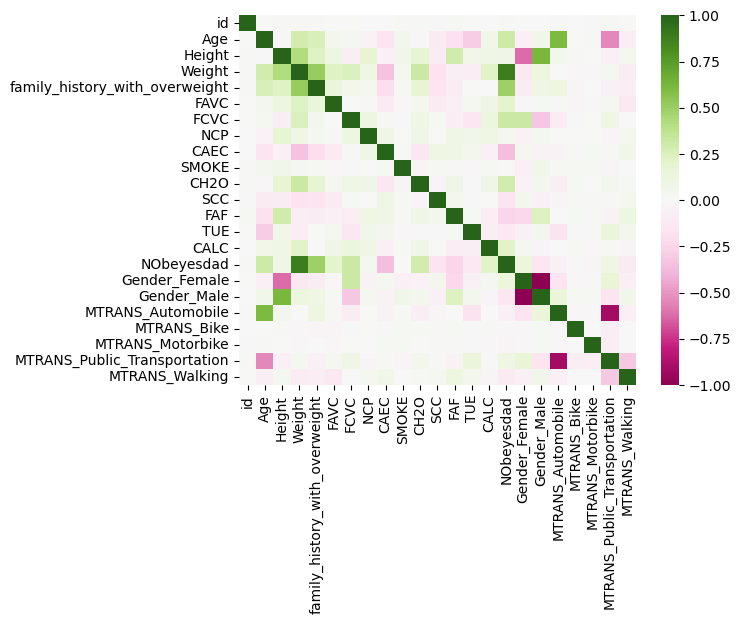

In [14]:
sns.heatmap(df2.corr(), cmap="PiYG", xticklabels=True, yticklabels=True)

In [15]:
correlation_matrix = df2.corr().abs()
correlation_matrix['NObeyesdad']

id                                0.013488
Age                               0.308443
Height                            0.083121
Weight                            0.885413
family_history_with_overweight    0.489404
FAVC                              0.205899
FCVC                              0.316439
NCP                               0.045358
CAEC                              0.354862
SMOKE                             0.004790
CH2O                              0.286392
SCC                               0.169786
FAF                               0.243932
TUE                               0.128228
CALC                              0.219944
NObeyesdad                        1.000000
Gender_Female                     0.148307
Gender_Male                       0.148307
MTRANS_Automobile                 0.056887
MTRANS_Bike                       0.021417
MTRANS_Motorbike                  0.023723
MTRANS_Public_Transportation      0.096757
MTRANS_Walking                    0.102383
Name: NObey

In [16]:
#Filtering less correlated data
unkey_features = correlation_matrix[correlation_matrix['NObeyesdad']<0.11]['NObeyesdad'].index

In [17]:
unkey_features

Index(['id', 'Height', 'NCP', 'SMOKE', 'MTRANS_Automobile', 'MTRANS_Bike',
       'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking'],
      dtype='object')

In [18]:
#Dropping only id and label
X1=df.drop(labels=['id','NObeyesdad'], axis=1)
y=df['NObeyesdad']
X1.head()

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,...,FAF,TUE,CALC,Gender_Female,Gender_Male,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,1,0,2.763573,...,0.000000,0.976473,1,False,True,False,False,False,True,False
1,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,2,0,2.000000,...,1.000000,1.000000,0,True,False,True,False,False,False,False
2,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,1,0,1.910378,...,0.866045,1.673584,0,True,False,False,False,False,True,False
3,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,1,0,1.674061,...,1.467863,0.780199,1,True,False,False,False,False,True,False
4,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,1,0,1.979848,...,1.967973,0.931721,1,False,True,False,False,False,True,False


In [19]:
#Dropping all features with correlation <0.11
X2=df.drop(labels=unkey_features, axis=1)
X2=X2.drop(labels=['NObeyesdad'], axis=1)
X2.head()

,Age,Weight,family_history_with_overweight,FAVC,FCVC,CAEC,CH2O,SCC,FAF,TUE,CALC,Gender_Female,Gender_Male
0,24.443011,81.669950,1,1,2.000000,1,2.763573,0,0.000000,0.976473,1,False,True
1,18.000000,57.000000,1,1,2.000000,2,2.000000,0,1.000000,1.000000,0,True,False
2,18.000000,50.165754,1,1,1.880534,1,1.910378,0,0.866045,1.673584,0,True,False
3,20.952737,131.274851,1,1,3.000000,1,1.674061,0,1.467863,0.780199,1,True,False
4,31.641081,93.798055,1,1,2.679664,1,1.979848,0,1.967973,0.931721,1,False,True


### Scaling Data and Splitting into Train & Test
1. Train one ML model with X1
2. Train one ML model with X2
3. Choose the X which yields the higher accuracy of model

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X2) #X1 or X2

from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler()
scaled_features = mm_scaler.fit_transform(X2)

In [22]:
X_scaled = pd.DataFrame(scaled_features,columns=X2.columns[:]) #X1 or X2
X_scaled.head()

,Age,Weight,family_history_with_overweight,FAVC,FCVC,CAEC,CH2O,SCC,FAF,TUE,CALC,Gender_Female,Gender_Male
0,0.105699,-0.235713,0.469099,0.30588,-0.836279,-0.337845,1.206594,-0.185009,-1.171141,0.597438,0.471288,-1.004152,1.004152
1,-1.027052,-1.170931,0.469099,0.30588,-0.836279,1.889204,-0.048349,-0.185009,0.021775,0.636513,-1.639846,0.995866,-0.995866
2,-1.027052,-1.430012,0.469099,0.30588,-1.060332,-0.337845,-0.195644,-0.185009,-0.138022,1.755239,-1.639846,0.995866,-0.995866
3,-0.507929,1.644770,0.469099,0.30588,1.039171,-0.337845,-0.584035,-0.185009,0.579896,0.271455,0.471288,0.995866,-0.995866
4,1.371197,0.224054,0.469099,0.30588,0.438397,-0.337845,-0.081469,-0.185009,1.176486,0.523111,0.471288,-1.004152,1.004152


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)

In [100]:
X_train.head()

,Age,Weight,family_history_with_overweight,FAVC,FCVC,CAEC,CH2O,SCC,FAF,TUE,CALC,Gender_Female,Gender_Male
10466,1.189490,1.395704,0.469099,0.30588,0.387976,-0.337845,-1.508053,-0.185009,-0.360036,-1.024344,0.471288,-1.004152,1.004152
4960,-0.503691,-0.488565,0.469099,-3.26926,-0.836279,-0.337845,-1.691863,-0.185009,-0.660687,0.636513,0.471288,-1.004152,1.004152
17682,-0.861626,1.740637,0.469099,0.30588,1.039171,-0.337845,1.328582,-0.185009,0.431989,0.508635,0.471288,0.995866,-0.995866
20549,0.379434,0.702582,0.469099,0.30588,1.039171,-0.337845,1.027554,-0.185009,-1.171141,0.200083,0.471288,0.995866,-0.995866
13099,0.172925,0.520813,0.469099,0.30588,0.590202,-0.337845,-1.663914,-0.185009,0.077696,0.023434,-1.639846,-1.004152,1.004152


### 1. Logistic Regression (OvR)

In [52]:
from sklearn.linear_model import LogisticRegression
model_ovr = LogisticRegression(multi_class='ovr', max_iter=2000)
model_ovr.fit(X_train,y_train)
pred1 = model_ovr.predict(X_test)

In [53]:
#Training with X1
print(classification_report(y_test, pred1))

                     precision    recall  f1-score   support

Insufficient_Weight       0.86      0.95      0.90       729
      Normal_Weight       0.67      0.65      0.66       980
     Obesity_Type_I       0.62      0.69      0.65       868
    Obesity_Type_II       0.88      0.97      0.92       960
   Obesity_Type_III       0.99      1.00      0.99      1189
 Overweight_Level_I       0.53      0.45      0.49       714
Overweight_Level_II       0.55      0.46      0.50       788

           accuracy                           0.76      6228
          macro avg       0.73      0.74      0.73      6228
       weighted avg       0.75      0.76      0.75      6228



In [25]:
#Training with X2
print(classification_report(y_test, pred1))

                     precision    recall  f1-score   support

Insufficient_Weight       0.86      0.95      0.90       729
      Normal_Weight       0.67      0.65      0.66       980
     Obesity_Type_I       0.62      0.69      0.65       868
    Obesity_Type_II       0.88      0.97      0.92       960
   Obesity_Type_III       0.99      1.00      0.99      1189
 Overweight_Level_I       0.53      0.45      0.49       714
Overweight_Level_II       0.55      0.46      0.50       788

           accuracy                           0.76      6228
          macro avg       0.73      0.74      0.73      6228
       weighted avg       0.75      0.76      0.75      6228



#### Reinitialise the train and test with the better features

In [22]:
#X1 provides better accuracy, reintialise X and y using X1
scaled_features = scaler.fit_transform(X1)
X_scaled = pd.DataFrame(scaled_features,columns=X1.columns[:])
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)

In [151]:
#Dataframe to store accuracy values of various ML Models
models = {'Model Type': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Support Vector Machine', 'Neural Network_Baseline', 'Neural Network_Pruning'], 
           'Accuracy' : [0,0,0,0,0,0] }
model_comparision = pd.DataFrame(models)
model_comparision.iloc[(0,1)] = classification_report(y_test, pred1, output_dict=True)['accuracy']
model_comparision

,Model Type,Accuracy
0,Logistic Regression,0.758349
1,Decision Tree,0.000000
2,Random Forest,0.000000
3,Support Vector Machine,0.000000
4,Neural Network_Baseline,0.000000
5,Neural Network_Pruning,0.000000


### 2. Decision Tree

In [55]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
pred2 = dtree.predict(X_test)

In [56]:
print(classification_report(y_test, pred2))

                     precision    recall  f1-score   support

Insufficient_Weight       0.87      0.88      0.88       729
      Normal_Weight       0.81      0.80      0.81       980
     Obesity_Type_I       0.81      0.81      0.81       868
    Obesity_Type_II       0.95      0.95      0.95       960
   Obesity_Type_III       0.99      0.99      0.99      1189
 Overweight_Level_I       0.64      0.67      0.65       714
Overweight_Level_II       0.72      0.71      0.72       788

           accuracy                           0.84      6228
          macro avg       0.83      0.83      0.83      6228
       weighted avg       0.84      0.84      0.84      6228



In [152]:
model_comparision.iloc[(1,1)] = classification_report(y_test, pred2, output_dict=True)['accuracy']
model_comparision

,Model Type,Accuracy
0,Logistic Regression,0.758349
1,Decision Tree,0.843288
2,Random Forest,0.000000
3,Support Vector Machine,0.000000
4,Neural Network_Baseline,0.000000
5,Neural Network_Pruning,0.000000


### 3. Random Forests

In [58]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred3 = rfc.predict(X_test)

In [59]:
#n = 100
print(classification_report(y_test, pred3))

                     precision    recall  f1-score   support

Insufficient_Weight       0.93      0.94      0.93       729
      Normal_Weight       0.86      0.89      0.88       980
     Obesity_Type_I       0.90      0.87      0.88       868
    Obesity_Type_II       0.97      0.97      0.97       960
   Obesity_Type_III       1.00      1.00      1.00      1189
 Overweight_Level_I       0.79      0.75      0.77       714
Overweight_Level_II       0.81      0.83      0.82       788

           accuracy                           0.90      6228
          macro avg       0.89      0.89      0.89      6228
       weighted avg       0.90      0.90      0.90      6228



In [153]:
model_comparision.iloc[(2,1)] = classification_report(y_test, pred3, output_dict=True)['accuracy']
model_comparision

,Model Type,Accuracy
0,Logistic Regression,0.758349
1,Decision Tree,0.843288
2,Random Forest,0.902537
3,Support Vector Machine,0.000000
4,Neural Network_Baseline,0.000000
5,Neural Network_Pruning,0.000000


### 4. Support Vector Machines

In [67]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
pred4 = svc.predict(X_test)

In [68]:
print(classification_report(y_test, pred4))

                     precision    recall  f1-score   support

Insufficient_Weight       0.89      0.90      0.90       729
      Normal_Weight       0.80      0.80      0.80       980
     Obesity_Type_I       0.86      0.80      0.83       868
    Obesity_Type_II       0.95      0.97      0.96       960
   Obesity_Type_III       1.00      0.99      1.00      1189
 Overweight_Level_I       0.66      0.67      0.66       714
Overweight_Level_II       0.72      0.76      0.74       788

           accuracy                           0.85      6228
          macro avg       0.84      0.84      0.84      6228
       weighted avg       0.86      0.85      0.85      6228



In [70]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.480 total time=  17.3s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.478 total time=  17.3s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.474 total time=  14.5s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.483 total time=  14.7s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.477 total time=  12.7s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.757 total time=   7.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.763 total time=   7.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.754 total time=   7.4s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.763 total time=   7.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.748 total time=   7.2s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.726 total time=   7.8s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.707 total time=  13.8s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.692 total time=  15.2s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.703 total time=  13.5s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.702 total time=  14.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.810 total time=   6.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.805 total time=   5.8s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.799 total time=   5.5s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.803 total time=   5.7s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.799 total time=   5.4s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.857 total time=   6.7s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.857 total time=   6.8s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.851 total time=   6.8s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [71]:
grid.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [72]:
grid.best_estimator_

SVC(C=1000, gamma=0.001)

In [77]:
pred4 = grid.predict(X_test)

In [78]:
print(classification_report(y_test, pred4))

                     precision    recall  f1-score   support

Insufficient_Weight       0.90      0.94      0.92       729
      Normal_Weight       0.88      0.84      0.86       980
     Obesity_Type_I       0.88      0.85      0.86       868
    Obesity_Type_II       0.95      0.97      0.96       960
   Obesity_Type_III       1.00      1.00      1.00      1189
 Overweight_Level_I       0.74      0.74      0.74       714
Overweight_Level_II       0.78      0.78      0.78       788

           accuracy                           0.89      6228
          macro avg       0.87      0.88      0.87      6228
       weighted avg       0.89      0.89      0.89      6228



In [154]:
model_comparision.iloc[(3,1)] = classification_report(y_test, pred4, output_dict=True)['accuracy']
model_comparision

,Model Type,Accuracy
0,Logistic Regression,0.758349
1,Decision Tree,0.843288
2,Random Forest,0.902537
3,Support Vector Machine,0.885356
4,Neural Network_Baseline,0.000000
5,Neural Network_Pruning,0.000000


### Neural Networks

In [88]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from keras.utils import to_categorical
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [89]:
X_train.shape

(14530, 21)

In [90]:
y_train

3549     Overweight_Level_II
7633        Obesity_Type_III
15023        Obesity_Type_II
12134     Overweight_Level_I
19059          Normal_Weight
                ...         
10959        Obesity_Type_II
20392    Insufficient_Weight
7252           Normal_Weight
19368       Obesity_Type_III
16019    Insufficient_Weight
Name: NObeyesdad, Length: 14530, dtype: object

In [91]:
#One Hot Encode the labels into boolean values to train the neural network
def one_hot_encode(Y):
    encoder = LabelEncoder()
    encoder.fit(Y)
    encoded_Y = encoder.transform(Y)
    dummy_y = np_utils.to_categorical(encoded_Y)
    return dummy_y

In [92]:
y_train_ann=one_hot_encode(y_train)
y_train_ann

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [93]:
y_test_ann=one_hot_encode(y_test)
y_test_ann

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [94]:
#Base model with no droptout or hidden layers
def baseline_model():
    #Create Model
    model = Sequential()
    model.add(Dense(units=22, activation='relu'))
    model.add(Dense(units=11, activation='relu'))
    model.add(Dense(units=7, activation='softmax'))
    #Compile Model
    model.compile(loss='categorical_crossentropy', optimizer='adam')
    return model

In [95]:
ann_baseline = baseline_model()

In [96]:
ann_baseline.fit(x=X_train, y=y_train_ann, epochs=600, 
                 validation_data=(X_test, y_test_ann), verbose=1 )

Epoch 1/600
455/455 [==============================] - 2s 2ms/step - loss: 1.4503 - val_loss: 0.9059
Epoch 2/600
455/455 [==============================] - 1s 2ms/step - loss: 0.7246 - val_loss: 0.6237
Epoch 3/600
455/455 [==============================] - 1s 2ms/step - loss: 0.5476 - val_loss: 0.5127
Epoch 4/600
455/455 [==============================] - 1s 2ms/step - loss: 0.4695 - val_loss: 0.4577
Epoch 5/600
455/455 [==============================] - 1s 2ms/step - loss: 0.4322 - val_loss: 0.4355
Epoch 6/600
455/455 [==============================] - 1s 2ms/step - loss: 0.4123 - val_loss: 0.4191
Epoch 7/600
455/455 [==============================] - 1s 2ms/step - loss: 0.4020 - val_loss: 0.4089
Epoch 8/600
455/455 [==============================] - 1s 2ms/step - loss: 0.3945 - val_loss: 0.4030
Epoch 9/600
455/455 [==============================] - 2s 3ms/step - loss: 0.3886 - val_loss: 0.3993
Epoch 10/600
455/455 [==============================] - 1s 3ms/step - loss: 0.3843 - val_lo

455/455 [==============================] - 1s 2ms/step - loss: 0.3365 - val_loss: 0.3712
Epoch 82/600
455/455 [==============================] - 1s 2ms/step - loss: 0.3370 - val_loss: 0.3643
Epoch 83/600
455/455 [==============================] - 1s 2ms/step - loss: 0.3350 - val_loss: 0.3639
Epoch 84/600
455/455 [==============================] - 1s 2ms/step - loss: 0.3354 - val_loss: 0.3653
Epoch 85/600
455/455 [==============================] - 1s 2ms/step - loss: 0.3355 - val_loss: 0.3640
Epoch 86/600
455/455 [==============================] - 1s 2ms/step - loss: 0.3349 - val_loss: 0.3693
Epoch 87/600
455/455 [==============================] - 1s 2ms/step - loss: 0.3353 - val_loss: 0.3639
Epoch 88/600
455/455 [==============================] - 1s 2ms/step - loss: 0.3353 - val_loss: 0.3616
Epoch 89/600
455/455 [==============================] - 1s 2ms/step - loss: 0.3348 - val_loss: 0.3627
Epoch 90/600
455/455 [==============================] - 1s 2ms/step - loss: 0.3339 - val_loss: 

Epoch 161/600
455/455 [==============================] - 1s 2ms/step - loss: 0.3245 - val_loss: 0.3657
Epoch 162/600
455/455 [==============================] - 1s 2ms/step - loss: 0.3242 - val_loss: 0.3626
Epoch 163/600
455/455 [==============================] - 1s 2ms/step - loss: 0.3248 - val_loss: 0.3680
Epoch 164/600
455/455 [==============================] - 1s 2ms/step - loss: 0.3235 - val_loss: 0.3630
Epoch 165/600
455/455 [==============================] - 1s 2ms/step - loss: 0.3247 - val_loss: 0.3642
Epoch 166/600
455/455 [==============================] - 1s 2ms/step - loss: 0.3247 - val_loss: 0.3649
Epoch 167/600
455/455 [==============================] - 1s 2ms/step - loss: 0.3239 - val_loss: 0.3644
Epoch 168/600
455/455 [==============================] - 1s 2ms/step - loss: 0.3226 - val_loss: 0.3697
Epoch 169/600
455/455 [==============================] - 1s 2ms/step - loss: 0.3243 - val_loss: 0.3661
Epoch 170/600
455/455 [==============================] - 1s 2ms/step - lo

455/455 [==============================] - 1s 2ms/step - loss: 0.3185 - val_loss: 0.3659
Epoch 241/600
455/455 [==============================] - 1s 2ms/step - loss: 0.3201 - val_loss: 0.3637
Epoch 242/600
455/455 [==============================] - 1s 2ms/step - loss: 0.3181 - val_loss: 0.3657
Epoch 243/600
455/455 [==============================] - 1s 2ms/step - loss: 0.3182 - val_loss: 0.3657
Epoch 244/600
455/455 [==============================] - 1s 2ms/step - loss: 0.3172 - val_loss: 0.3635
Epoch 245/600
455/455 [==============================] - 1s 2ms/step - loss: 0.3193 - val_loss: 0.3635
Epoch 246/600
455/455 [==============================] - 1s 2ms/step - loss: 0.3170 - val_loss: 0.3685
Epoch 247/600
455/455 [==============================] - 1s 2ms/step - loss: 0.3187 - val_loss: 0.3677
Epoch 248/600
455/455 [==============================] - 1s 2ms/step - loss: 0.3175 - val_loss: 0.3634
Epoch 249/600
455/455 [==============================] - 1s 2ms/step - loss: 0.3183 - v

455/455 [==============================] - 1s 2ms/step - loss: 0.3156 - val_loss: 0.3673
Epoch 320/600
455/455 [==============================] - 1s 2ms/step - loss: 0.3144 - val_loss: 0.3676
Epoch 321/600
455/455 [==============================] - 1s 2ms/step - loss: 0.3145 - val_loss: 0.3675
Epoch 322/600
455/455 [==============================] - 1s 2ms/step - loss: 0.3139 - val_loss: 0.3692
Epoch 323/600
455/455 [==============================] - 1s 2ms/step - loss: 0.3135 - val_loss: 0.3698
Epoch 324/600
455/455 [==============================] - 1s 2ms/step - loss: 0.3139 - val_loss: 0.3711
Epoch 325/600
455/455 [==============================] - 1s 2ms/step - loss: 0.3139 - val_loss: 0.3656
Epoch 326/600
455/455 [==============================] - 1s 2ms/step - loss: 0.3149 - val_loss: 0.3679
Epoch 327/600
455/455 [==============================] - 1s 2ms/step - loss: 0.3145 - val_loss: 0.3683
Epoch 328/600
455/455 [==============================] - 1s 2ms/step - loss: 0.3145 - v

455/455 [==============================] - 1s 2ms/step - loss: 0.3109 - val_loss: 0.3705
Epoch 399/600
455/455 [==============================] - 1s 2ms/step - loss: 0.3115 - val_loss: 0.3704
Epoch 400/600
455/455 [==============================] - 1s 2ms/step - loss: 0.3123 - val_loss: 0.3688
Epoch 401/600
455/455 [==============================] - 1s 2ms/step - loss: 0.3120 - val_loss: 0.3705
Epoch 402/600
455/455 [==============================] - 1s 2ms/step - loss: 0.3115 - val_loss: 0.3676
Epoch 403/600
455/455 [==============================] - 1s 2ms/step - loss: 0.3126 - val_loss: 0.3689
Epoch 404/600
455/455 [==============================] - 1s 2ms/step - loss: 0.3123 - val_loss: 0.3677
Epoch 405/600
455/455 [==============================] - 1s 2ms/step - loss: 0.3120 - val_loss: 0.3721
Epoch 406/600
455/455 [==============================] - 1s 2ms/step - loss: 0.3116 - val_loss: 0.3707
Epoch 407/600
455/455 [==============================] - 1s 2ms/step - loss: 0.3107 - v

455/455 [==============================] - 1s 2ms/step - loss: 0.3103 - val_loss: 0.3697
Epoch 478/600
455/455 [==============================] - 1s 2ms/step - loss: 0.3111 - val_loss: 0.3692
Epoch 479/600
455/455 [==============================] - 1s 2ms/step - loss: 0.3103 - val_loss: 0.3710
Epoch 480/600
455/455 [==============================] - 1s 2ms/step - loss: 0.3109 - val_loss: 0.3699
Epoch 481/600
455/455 [==============================] - 1s 2ms/step - loss: 0.3101 - val_loss: 0.3692
Epoch 482/600
455/455 [==============================] - 1s 2ms/step - loss: 0.3091 - val_loss: 0.3691
Epoch 483/600
455/455 [==============================] - 1s 2ms/step - loss: 0.3101 - val_loss: 0.3689
Epoch 484/600
455/455 [==============================] - 1s 2ms/step - loss: 0.3111 - val_loss: 0.3749
Epoch 485/600
455/455 [==============================] - 1s 2ms/step - loss: 0.3104 - val_loss: 0.3673
Epoch 486/600
455/455 [==============================] - 1s 2ms/step - loss: 0.3098 - v

455/455 [==============================] - 1s 2ms/step - loss: 0.3096 - val_loss: 0.3693
Epoch 557/600
455/455 [==============================] - 1s 2ms/step - loss: 0.3089 - val_loss: 0.3734
Epoch 558/600
455/455 [==============================] - 1s 2ms/step - loss: 0.3090 - val_loss: 0.3713
Epoch 559/600
455/455 [==============================] - 1s 2ms/step - loss: 0.3097 - val_loss: 0.3699
Epoch 560/600
455/455 [==============================] - 1s 2ms/step - loss: 0.3088 - val_loss: 0.3718
Epoch 561/600
455/455 [==============================] - 1s 2ms/step - loss: 0.3086 - val_loss: 0.3686
Epoch 562/600
455/455 [==============================] - 1s 2ms/step - loss: 0.3088 - val_loss: 0.3731
Epoch 563/600
455/455 [==============================] - 1s 2ms/step - loss: 0.3083 - val_loss: 0.3717
Epoch 564/600
455/455 [==============================] - 1s 2ms/step - loss: 0.3109 - val_loss: 0.3707
Epoch 565/600
455/455 [==============================] - 1s 2ms/step - loss: 0.3093 - v

<Axes: >

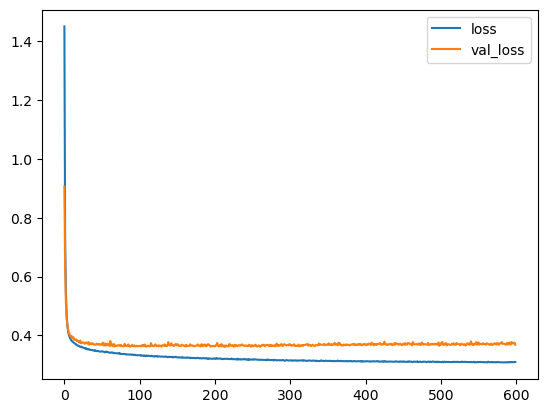

In [98]:
#Check if the model is being overtrained
ann_baseline_loss = pd.DataFrame(ann_baseline.history.history)
ann_baseline_loss.plot()

#### Early Stopping
Stop the training when there is no improvement in the validation loss

In [99]:
ann_baseline_earlystop = baseline_model()

In [100]:
from tensorflow.keras.callbacks import EarlyStopping

In [101]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [102]:
ann_baseline_earlystop.fit(x=X_train, 
                 y=y_train_ann, 
                 epochs=600, 
                 validation_data=(X_test, y_test_ann), verbose=1,
                 callbacks=[early_stop])

Epoch 1/600
455/455 [==============================] - 1s 2ms/step - loss: 1.3558 - val_loss: 0.9214
Epoch 2/600
455/455 [==============================] - 1s 2ms/step - loss: 0.7612 - val_loss: 0.6651
Epoch 3/600
455/455 [==============================] - 1s 2ms/step - loss: 0.5866 - val_loss: 0.5393
Epoch 4/600
455/455 [==============================] - 1s 2ms/step - loss: 0.4946 - val_loss: 0.4718
Epoch 5/600
455/455 [==============================] - 1s 2ms/step - loss: 0.4463 - val_loss: 0.4384
Epoch 6/600
455/455 [==============================] - 1s 2ms/step - loss: 0.4225 - val_loss: 0.4234
Epoch 7/600
455/455 [==============================] - 1s 2ms/step - loss: 0.4091 - val_loss: 0.4096
Epoch 8/600
455/455 [==============================] - 1s 2ms/step - loss: 0.4005 - val_loss: 0.4047
Epoch 9/600
455/455 [==============================] - 1s 2ms/step - loss: 0.3942 - val_loss: 0.3959
Epoch 10/600
455/455 [==============================] - 1s 2ms/step - loss: 0.3897 - val_lo

455/455 [==============================] - 1s 2ms/step - loss: 0.3295 - val_loss: 0.3640
Epoch 82/600
455/455 [==============================] - 1s 2ms/step - loss: 0.3300 - val_loss: 0.3611
Epoch 83/600
455/455 [==============================] - 1s 2ms/step - loss: 0.3286 - val_loss: 0.3636
Epoch 84/600
455/455 [==============================] - 1s 2ms/step - loss: 0.3288 - val_loss: 0.3635
Epoch 85/600
455/455 [==============================] - 1s 2ms/step - loss: 0.3284 - val_loss: 0.3636
Epoch 86/600
455/455 [==============================] - 1s 2ms/step - loss: 0.3286 - val_loss: 0.3604
Epoch 87/600
455/455 [==============================] - 1s 2ms/step - loss: 0.3287 - val_loss: 0.3671
Epoch 88/600
455/455 [==============================] - 1s 2ms/step - loss: 0.3274 - val_loss: 0.3645
Epoch 89/600
455/455 [==============================] - 1s 2ms/step - loss: 0.3275 - val_loss: 0.3649
Epoch 90/600
455/455 [==============================] - 1s 2ms/step - loss: 0.3276 - val_loss: 

<Axes: >

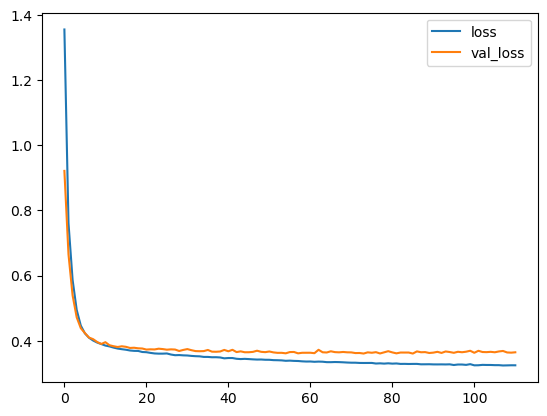

In [103]:
ann_baseline_earlystop_loss = pd.DataFrame(ann_baseline_earlystop.history.history)
ann_baseline_earlystop_loss.plot()

In [105]:
prediction_baseline = ann_baseline_earlystop.predict(X_test)

195/195 [==============================] - 0s 878us/step


In [106]:
prediction_baseline.shape

(6228, 7)

In [107]:
#Function to get the highest label as True and rest as False
def predict_to_boolean(predictions):
    for i in range(6228):
        for j in range(7):
            if j==np.argmax(predictions[i]):
                predictions[i][j]=1
            else:
                predictions[i][j]=0
    return predictions

In [109]:
prediction_baseline = predict_to_boolean(prediction_baseline)

In [110]:
print(classification_report(y_test_ann, prediction_baseline))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       729
           1       0.84      0.86      0.85       980
           2       0.88      0.82      0.85       868
           3       0.95      0.97      0.96       960
           4       0.99      0.99      0.99      1189
           5       0.76      0.68      0.72       714
           6       0.74      0.80      0.77       788

   micro avg       0.88      0.88      0.88      6228
   macro avg       0.87      0.87      0.87      6228
weighted avg       0.88      0.88      0.88      6228
 samples avg       0.88      0.88      0.88      6228



In [155]:
model_comparision.iloc[(4,1)] = classification_report(y_test_ann, prediction_baseline, output_dict=True)['weighted avg']['precision']
model_comparision

,Model Type,Accuracy
0,Logistic Regression,0.758349
1,Decision Tree,0.843288
2,Random Forest,0.902537
3,Support Vector Machine,0.885356
4,Neural Network_Baseline,0.877439
5,Neural Network_Pruning,0.000000


#### Early Stopping with Pruning

In [121]:
#The droup outs can be varied to achive the best trained model
def dropout_model():
    #Create Model
    model = Sequential()
    model.add(Dense(units=22, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(units=11, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(units=7, activation='softmax'))
    
    #Compile Model
    model.compile(loss='categorical_crossentropy', optimizer='adam')
    return model

In [122]:
ann_dropout = dropout_model()

In [123]:
ann_dropout.fit(x=X_train, 
                 y=y_train_ann, 
                 epochs=600, 
                 validation_data=(X_test, y_test_ann), verbose=1,
                 callbacks=[early_stop])

Epoch 1/600
455/455 [==============================] - 2s 2ms/step - loss: 1.8960 - val_loss: 1.5711
Epoch 2/600
455/455 [==============================] - 1s 2ms/step - loss: 1.5815 - val_loss: 1.2490
Epoch 3/600
455/455 [==============================] - 1s 2ms/step - loss: 1.4014 - val_loss: 1.0844
Epoch 4/600
455/455 [==============================] - 1s 2ms/step - loss: 1.2798 - val_loss: 1.0013
Epoch 5/600
455/455 [==============================] - 1s 2ms/step - loss: 1.2252 - val_loss: 0.9369
Epoch 6/600
455/455 [==============================] - 1s 2ms/step - loss: 1.1743 - val_loss: 0.8834
Epoch 7/600
455/455 [==============================] - 1s 2ms/step - loss: 1.1219 - val_loss: 0.8377
Epoch 8/600
455/455 [==============================] - 1s 2ms/step - loss: 1.0828 - val_loss: 0.8040
Epoch 9/600
455/455 [==============================] - 1s 2ms/step - loss: 1.0489 - val_loss: 0.7712
Epoch 10/600
455/455 [==============================] - 1s 2ms/step - loss: 1.0189 - val_lo

455/455 [==============================] - 1s 2ms/step - loss: 0.7877 - val_loss: 0.5728
Epoch 82/600
455/455 [==============================] - 1s 2ms/step - loss: 0.7810 - val_loss: 0.5752
Epoch 83/600
455/455 [==============================] - 1s 2ms/step - loss: 0.7842 - val_loss: 0.5751
Epoch 84/600
455/455 [==============================] - 1s 2ms/step - loss: 0.7882 - val_loss: 0.5713
Epoch 85/600
455/455 [==============================] - 1s 2ms/step - loss: 0.7833 - val_loss: 0.5709
Epoch 85: early stopping


In [124]:
prediction_dropout = ann_dropout.predict(X_test)

195/195 [==============================] - 0s 835us/step


In [125]:
prediction_dropout = predict_to_boolean(prediction_dropout)

In [126]:
print(classification_report(y_test_ann, prediction_baseline))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       729
           1       0.84      0.86      0.85       980
           2       0.88      0.82      0.85       868
           3       0.95      0.97      0.96       960
           4       0.99      0.99      0.99      1189
           5       0.76      0.68      0.72       714
           6       0.74      0.80      0.77       788

   micro avg       0.88      0.88      0.88      6228
   macro avg       0.87      0.87      0.87      6228
weighted avg       0.88      0.88      0.88      6228
 samples avg       0.88      0.88      0.88      6228



In [156]:
model_comparision.iloc[(5,1)] = classification_report(y_test_ann, prediction_dropout, output_dict=True)['weighted avg']['precision']
model_comparision

,Model Type,Accuracy
0,Logistic Regression,0.758349
1,Decision Tree,0.843288
2,Random Forest,0.902537
3,Support Vector Machine,0.885356
4,Neural Network_Baseline,0.877439
5,Neural Network_Pruning,0.830392


### Final Comparision Matrix

In [157]:
model_comparision

,Model Type,Accuracy
0,Logistic Regression,0.758349
1,Decision Tree,0.843288
2,Random Forest,0.902537
3,Support Vector Machine,0.885356
4,Neural Network_Baseline,0.877439
5,Neural Network_Pruning,0.830392


C:\Users\sanja\AppData\Local\Temp\ipykernel_16592\2403885491.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  comparision_plot.set_xticklabels(labels=model_comparision['Model Type'], rotation=90)


Text(0.5, 0, 'Model Type')

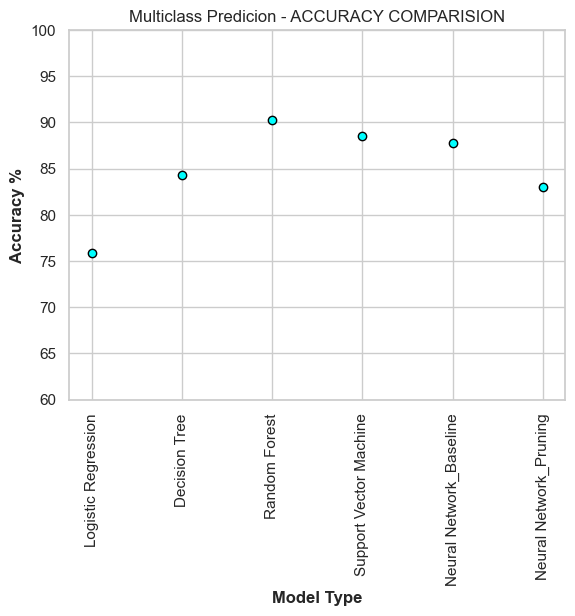

In [225]:
sns.set_theme(style="whitegrid")
comparision_plot = sns.scatterplot(x=model_comparision['Model Type'], y=model_comparision['Accuracy']*100,
                                   color='cyan', edgecolor='black', linewidth=1)
comparision_plot.set_xticklabels(labels=model_comparision['Model Type'], rotation=90)
comparision_plot.set_ylim(60,100)
comparision_plot.set(title='Multiclass Predicion - ACCURACY COMPARISION')
comparision_plot.set_ylabel(ylabel = 'Accuracy %', fontdict={'weight': 'bold'} )
comparision_plot.set_xlabel(xlabel='Model Type', fontdict={'weight': 'bold'})

Random forest outperform all models due as ensemble of many different decision trees